In [ ]:
import numpy as np 
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel(r'C:\Users\ADMIN\Desktop\Market-Basket-Analysis-main\groceries.xlsx', header = None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
# size of dataset 

There are 9835 rows and 32 columns


In [ ]:
df
#Showing Dataset 
#Filled with NaN values 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,0,0,0,0,0,0,0,0,0,0
9831,cooking chocolate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,0,0,0,0,0,0,0,0,0,0
9833,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sample(10)
# Some random rows from dataset 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1334,whole milk,beverages,pastry,soda,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3933,pip fruit,other vegetables,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2281,beverages,soft cheese,rolls/buns,sugar,misc. beverages,candy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,sausage,pork,whole milk,pastry,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3992,sausage,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8648,sausage,grapes,whole milk,seasonal products,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9340,root vegetables,yogurt,whipped/sour cream,UHT-milk,domestic eggs,rolls/buns,pickled vegetables,soda,bottled beer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7364,dessert,beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2266,pip fruit,yogurt,sliced cheese,frozen vegetables,domestic eggs,pickled vegetables,specialty vegetables,female sanitary products,napkins,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5707,hamburger meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
items = (df[0].unique())

for i in items:
    print(i)
    
#Finding unique items in column 1 (Mostly having all the unique items )

citrus fruit
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
potted plants
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
f

In [ ]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
encod_df = pd.DataFrame(encoded_vals)

#Encoding values 

encod_df

,photo/film,artif. sweetener,instant coffee,processed cheese,sliced cheese,turkey,frozen meals,ham,whipped/sour cream,finished products,...,white wine,female sanitary products,napkins,meat spreads,light bulbs,abrasive cleaner,curd cheese,margarine,semi-finished bread,citrus fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [ ]:
# Convert the DataFrame to boolean
boolean_df = encod_df.astype(bool)

# Call fpgrowth with the boolean DataFrame
freq_items = fpgrowth(boolean_df, min_support=0.005, use_colnames=True)
freq_items

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
995,0.005491,"(meat, soda)"
996,0.005084,"(root vegetables, meat)"
997,0.005287,"(sausage, meat)"
998,0.005287,"(meat, yogurt)"


In [ ]:
most_popular_items=freq_items.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items
#Top 15 most frequent items

,support,itemsets
6,0.255516,(whole milk)
9,0.193493,(other vegetables)
13,0.183935,(rolls/buns)
26,0.174377,(soda)
3,0.139502,(yogurt)
19,0.110524,(bottled water)
38,0.108998,(root vegetables)
4,0.104931,(tropical fruit)
46,0.098526,(shopping bags)
45,0.093950,(sausage)


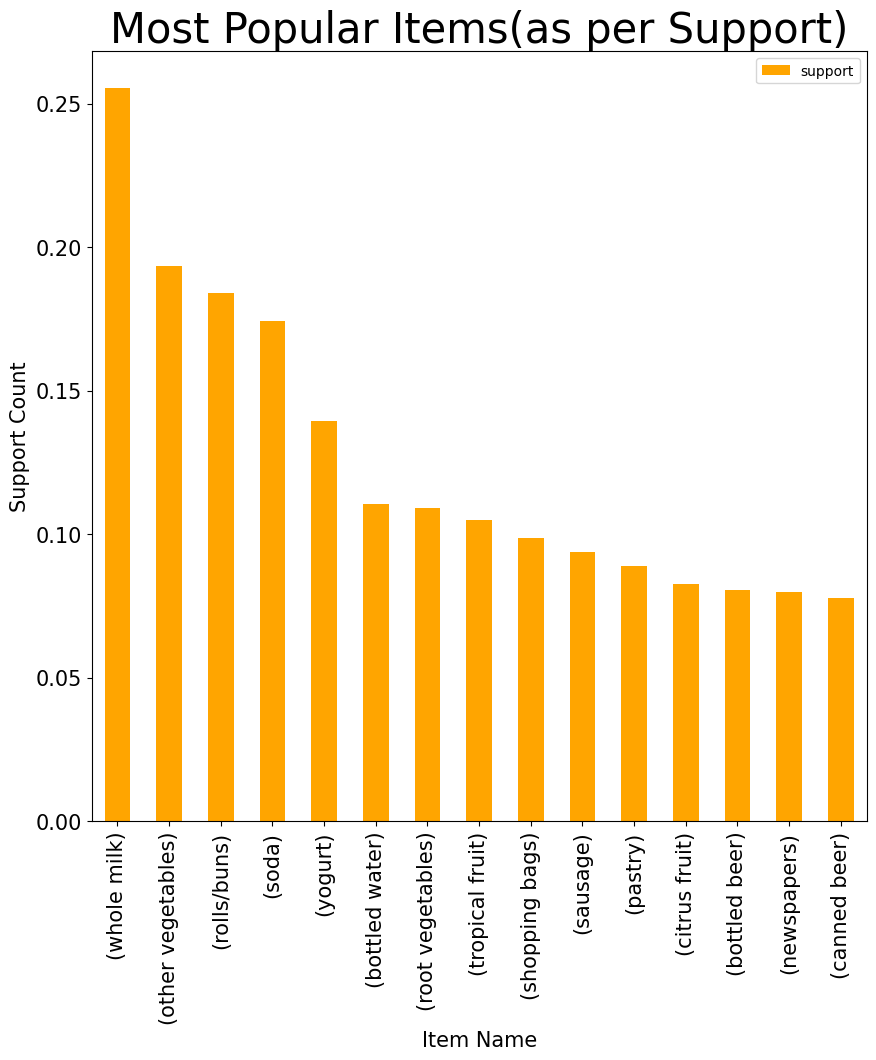

In [ ]:
most_popular_items.values.tolist()

plt.rcParams['figure.figsize']=(10,10)
most_popular_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577,0.411963
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467,0.509009
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803,0.542570
4,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,0.011244,1.178942,0.615125
...,...,...,...,...,...,...,...,...,...,...
95,"(rolls/buns, citrus fruit)",(other vegetables),0.016777,0.193493,0.005999,0.357576,1.848007,0.002753,1.255412,0.466706
96,"(rolls/buns, other vegetables)",(citrus fruit),0.042603,0.082766,0.005999,0.140811,1.701328,0.002473,1.067559,0.430567
97,"(citrus fruit, other vegetables)",(rolls/buns),0.028876,0.183935,0.005999,0.207746,1.129456,0.000688,1.030055,0.118027
98,(citrus fruit),"(rolls/buns, other vegetables)",0.082766,0.042603,0.005999,0.072482,1.701328,0.002473,1.032214,0.449420


In [ ]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
343,"(tropical fruit, root vegetables, yogurt)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613,0.640185
529,"(pip fruit, root vegetables, other vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720,0.626554
713,"(butter, whipped/sour cream)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659,0.619150
2056,"(whipped/sour cream, pip fruit)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126,0.611558
657,"(butter, yogurt)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648,0.608978
703,"(butter, root vegetables)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423,0.607217
951,"(curd, tropical fruit)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240,0.602956
79,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566,0.700899
454,"(other vegetables, pip fruit, yogurt)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291,0.596023
2260,"(domestic eggs, pip fruit)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536,0.595356


In [ ]:
#pip install matplotlib

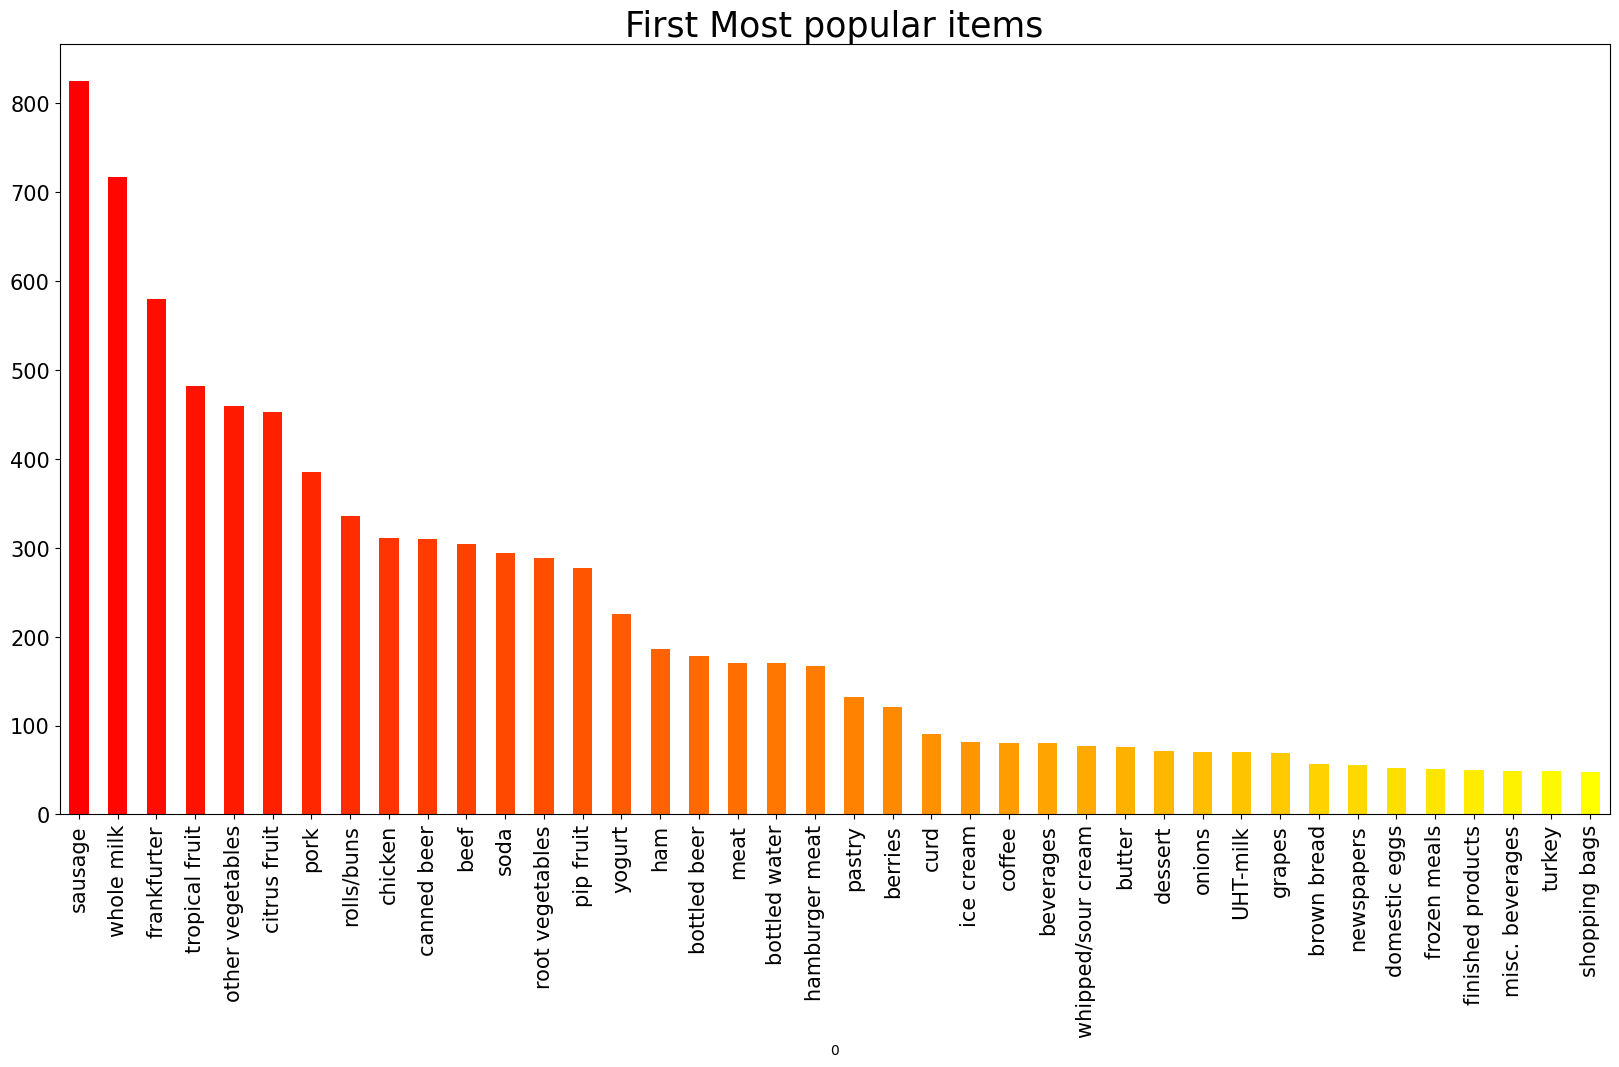

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid()

plt.show()

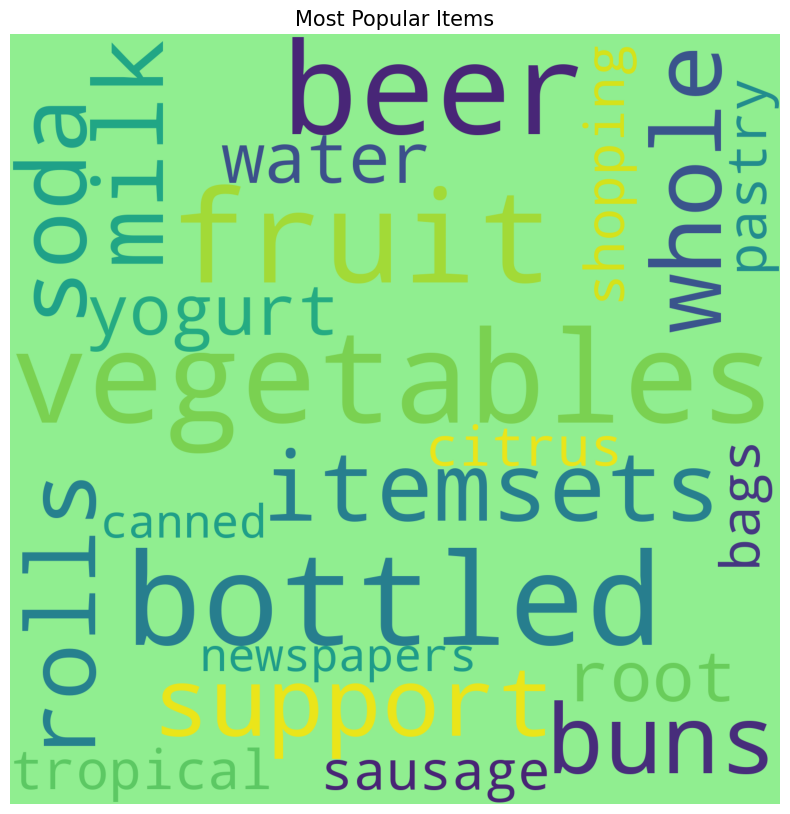

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color = 'lightgreen', width = 1500, height = 1500, max_words = 121).generate(str(most_popular_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

In [ ]:
try:
    with pd.ExcelWriter('d.xlsx') as writer:
        a_confi_top.drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1).head(100).to_excel(writer, index=False)
        # Additional sheets or operations can be added here
    print("Data written successfully to 'd.xlsx'")
except Exception as e:
    print("An error occurred:", e)

Data written successfully to 'd.xlsx'


In [ ]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.2)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
149,"(tropical fruit, root vegetables, yogurt)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613,0.640185
215,"(pip fruit, root vegetables, other vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720,0.626554
269,"(butter, whipped/sour cream)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659,0.619150
742,"(whipped/sour cream, pip fruit)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126,0.611558
244,"(butter, yogurt)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648,0.608978
263,"(butter, root vegetables)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423,0.607217
346,"(curd, tropical fruit)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240,0.602956
32,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566,0.700899
182,"(other vegetables, pip fruit, yogurt)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291,0.596023
798,"(domestic eggs, pip fruit)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536,0.595356


In [ ]:
association_supp=association_rules(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head()

,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
2,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
3,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
4,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
5,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
0,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157,0.488608


In [ ]:
association_lift=association_rules(freq_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
55,"(whole milk, tropical fruit)","(root vegetables, yogurt)",0.005694,0.134615,5.212371,0.004602,1.125712,0.843841
56,"(root vegetables, yogurt)","(whole milk, tropical fruit)",0.005694,0.220472,5.212371,0.004602,1.228567,0.829573
53,"(whole milk, yogurt)","(root vegetables, tropical fruit)",0.005694,0.101633,4.828814,0.004515,1.089703,0.839969
58,"(root vegetables, tropical fruit)","(whole milk, yogurt)",0.005694,0.270531,4.828814,0.004515,1.294059,0.809957
93,"(root vegetables, pip fruit)","(whole milk, other vegetables)",0.005491,0.352941,4.716272,0.004326,1.429801,0.800420
90,"(whole milk, other vegetables)","(root vegetables, pip fruit)",0.005491,0.073370,4.716272,0.004326,1.062390,0.851705
204,(ham),(white bread),0.005084,0.195312,4.639851,0.003988,1.190407,0.805441
205,(white bread),(ham),0.005084,0.120773,4.639851,0.003988,1.107758,0.818949
46,"(root vegetables, tropical fruit)","(whole milk, other vegetables)",0.007016,0.333333,4.454257,0.005441,1.387748,0.792169
43,"(whole milk, other vegetables)","(root vegetables, tropical fruit)",0.007016,0.093750,4.454257,0.005441,1.080224,0.838224
